In [1]:
center = 0.7;
up = 2.3;
right = 0.4;
down = -0.4;
left = 0.7;

In [2]:
# rewards are all zeros

In [7]:
γ = 0.9

In [8]:
γ * (up + right + down + left) / 4

0.675

In [19]:
from dataclasses import dataclass

In [44]:
@dataclass
class Location:
    row: int
    col: int
        
    @classmethod
    def _move_shift (klass, action) -> (int, int):
        if action == 'up':
            return (-1, 0)
        elif action == 'right':
            return (0, 1)
        elif action == 'down':
            return (1, 0)
        elif action == 'left':
            return (0, -1)
        else:
            assert False, f'Unrecognized action {action}'
        
    def move (self, action):
        if (self.row, self.col) == (0, 1):
            return 10, Location(4, 1)
        elif (self.row, self.col) == (1, 3):
            return 5, Location(3, 3)
        shift = Location._move_shift(action)
        new_row, new_col = self.row + shift[0], self.col + shift[1]
        if (new_row < 0) or (new_row >= 5) or (new_col < 0) or (new_col >= 5):
            return -1, self
        else:
            return 0, Location(new_row, new_col)
        
    def index(self) -> int:
        return self.row * 5 + self.col

In [39]:
l = Location(0,0)

In [40]:
l.move('right')

(0, Location(row=0, col=1))

In [42]:
l.move('right')[1].move('right')

(10, Location(row=4, col=1))

In [43]:
l.move('up')

(-1, Location(row=0, col=0))

In [9]:
import numpy as np

In [47]:
collect_coefficients = [None] * 5 * 5

In [64]:
for row in range(5):
    for col in range(5):
        l = Location(row, col)
        idx = l.index()
        coefficients = [0] * 5 * 5
        coefficients[idx] = 1
        total_r = 0
        for action in ['up', 'right', 'down', 'left']:
            r, next_location = l.move(action)
            coefficients[next_location.index()] -= γ / 4
            total_r += r / 4
        collect_coefficients[idx] = (coefficients, total_r)

In [65]:
A, b = zip(*collect_coefficients)

In [60]:
import matplotlib.pyplot as plt

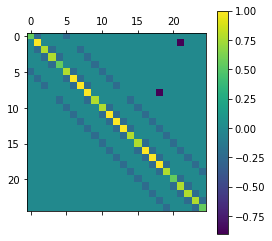

In [66]:
plt.matshow(A)
plt.colorbar();

In [68]:
ans = np.linalg.solve(A, b)

In [74]:
arr = np.zeros((5, 5))

In [75]:
for row in range(5):
    for col in range(5):
        idx = Location(row, col).index()
        arr[row, col] = ans[idx]

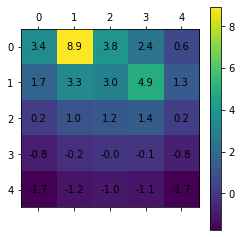

In [78]:
plt.matshow(arr)
for (i, j), z in np.ndenumerate(arr):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.colorbar();